# HD189733

**Note**: In this case the first visit from prop 12181 has the target overlap significantly with a background target, and doesn't have any data during transit, so we omit this dataset.

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
import astropy.units as u

In [119]:
name = 'HD189733'

In [120]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [121]:
obs = om.Observation.from_files(fnames)

In [122]:
clc = lcs = lk.search_lightcurve(name, author='SPOC', exptime=120).download_all().stitch().remove_nans().flatten(401)
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

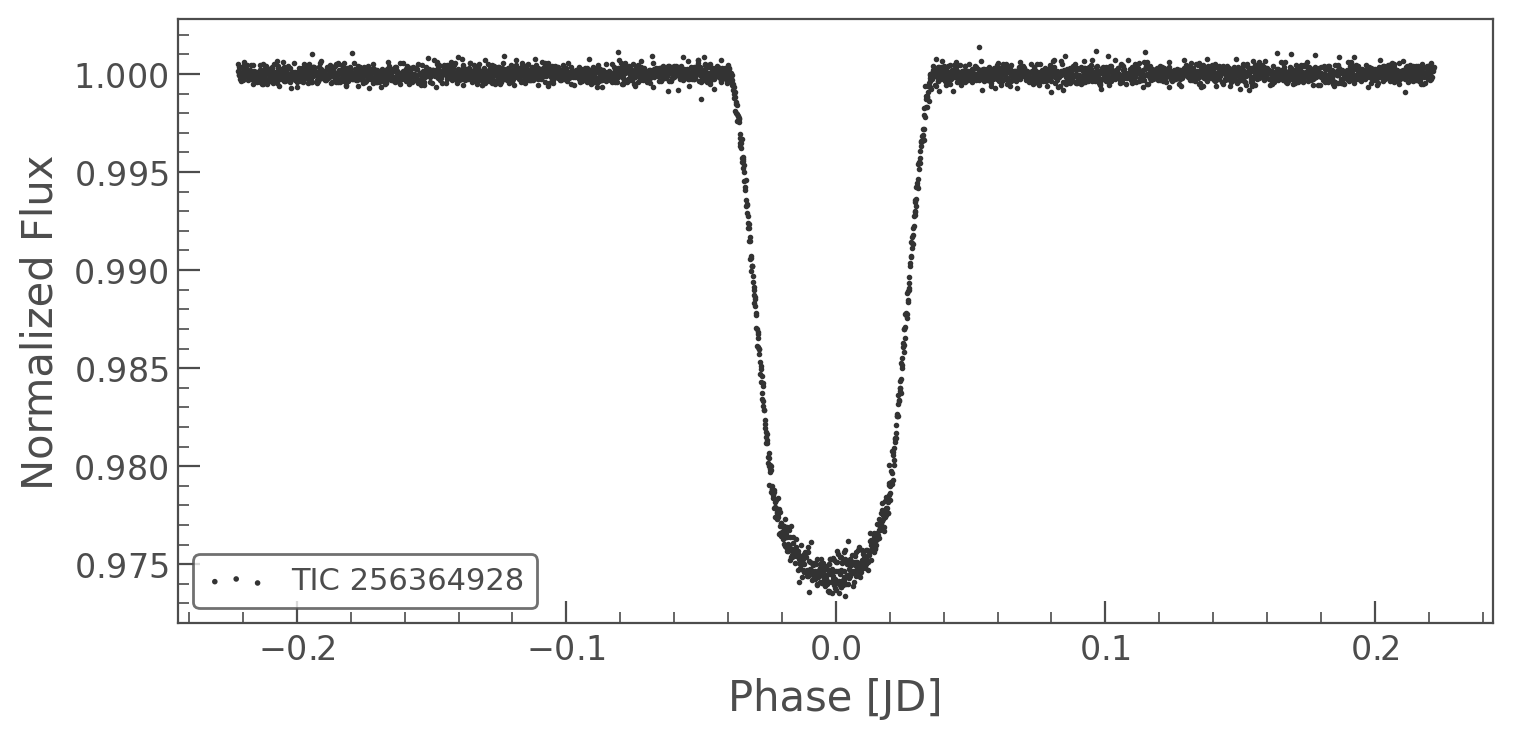

In [123]:
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [124]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2457000,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

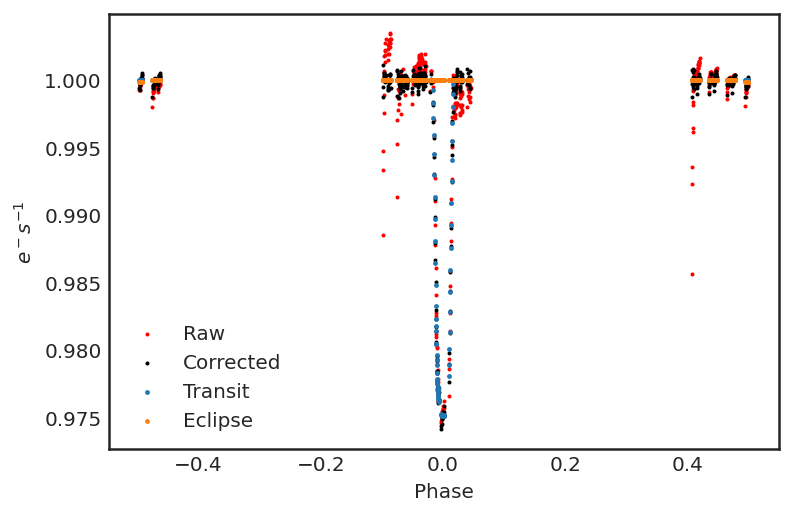

In [125]:
obs.plot()

In [126]:
obs.fit_model()

Fitting Transit/Eclipse Model: 100%|██████████████| 5/5 [01:19<00:00, 15.93s/it]


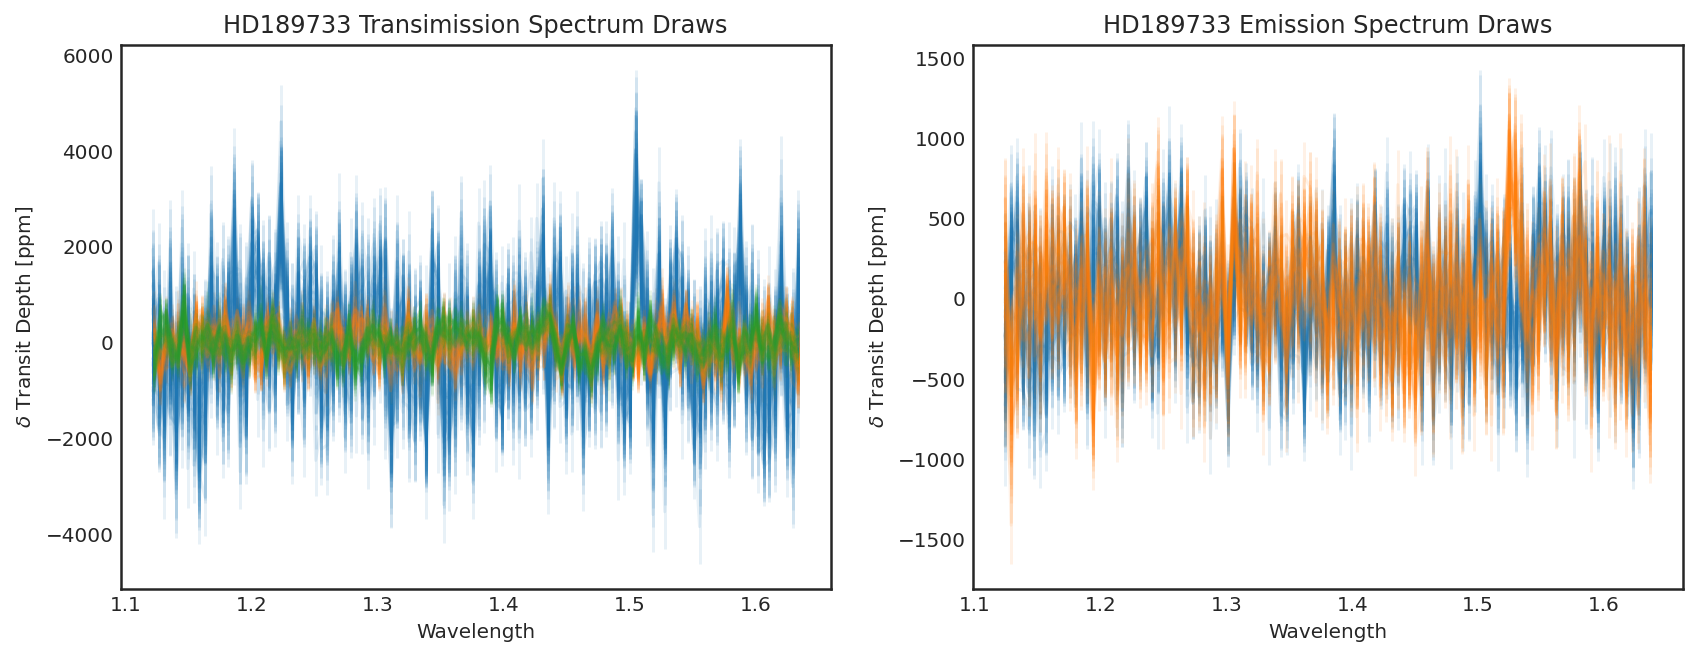

In [127]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HD189733 Transmission Spectrum, Visit: 3'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

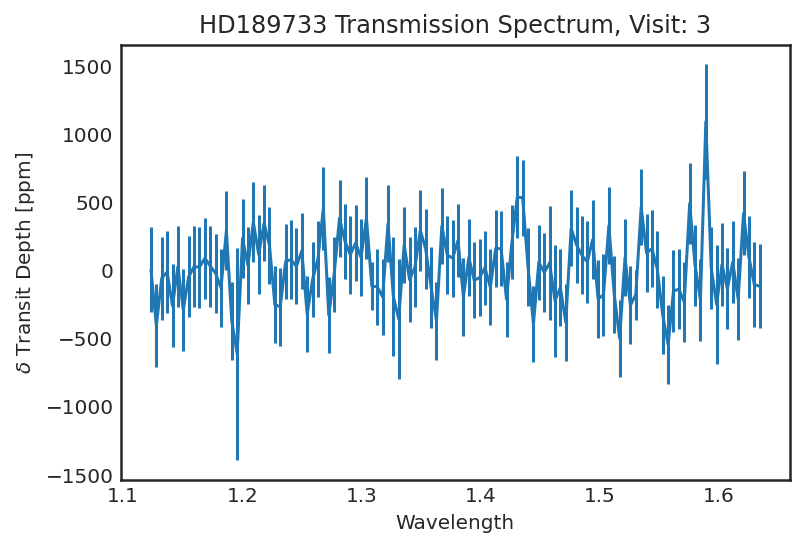

In [128]:
om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

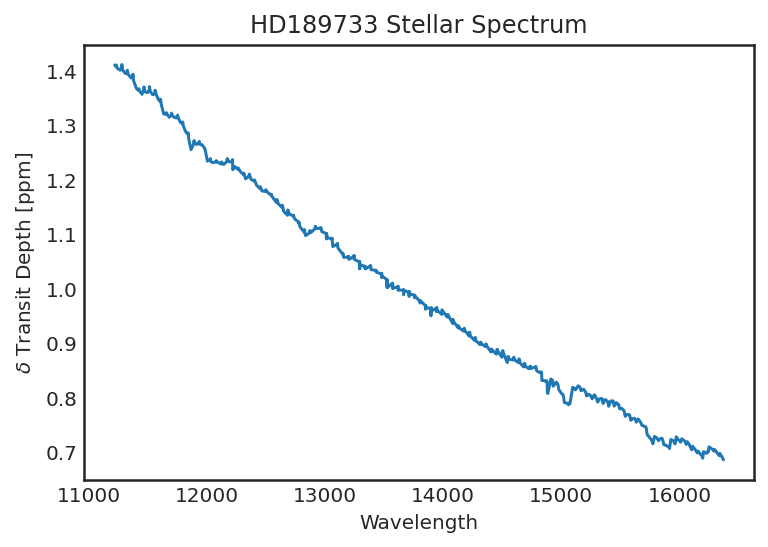

In [129]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [130]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

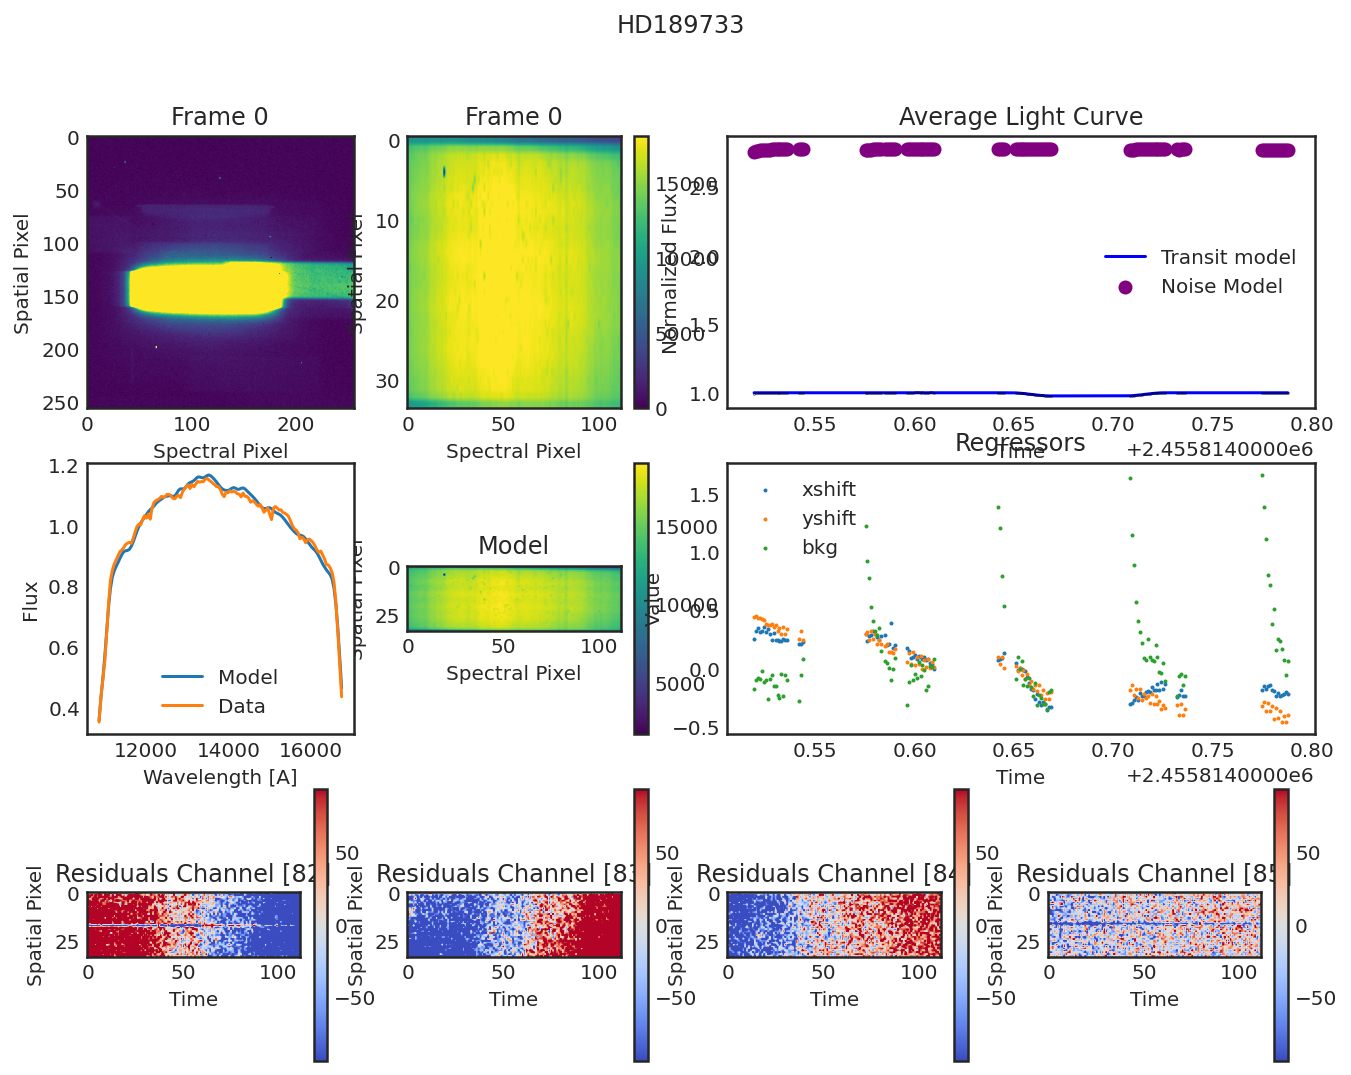

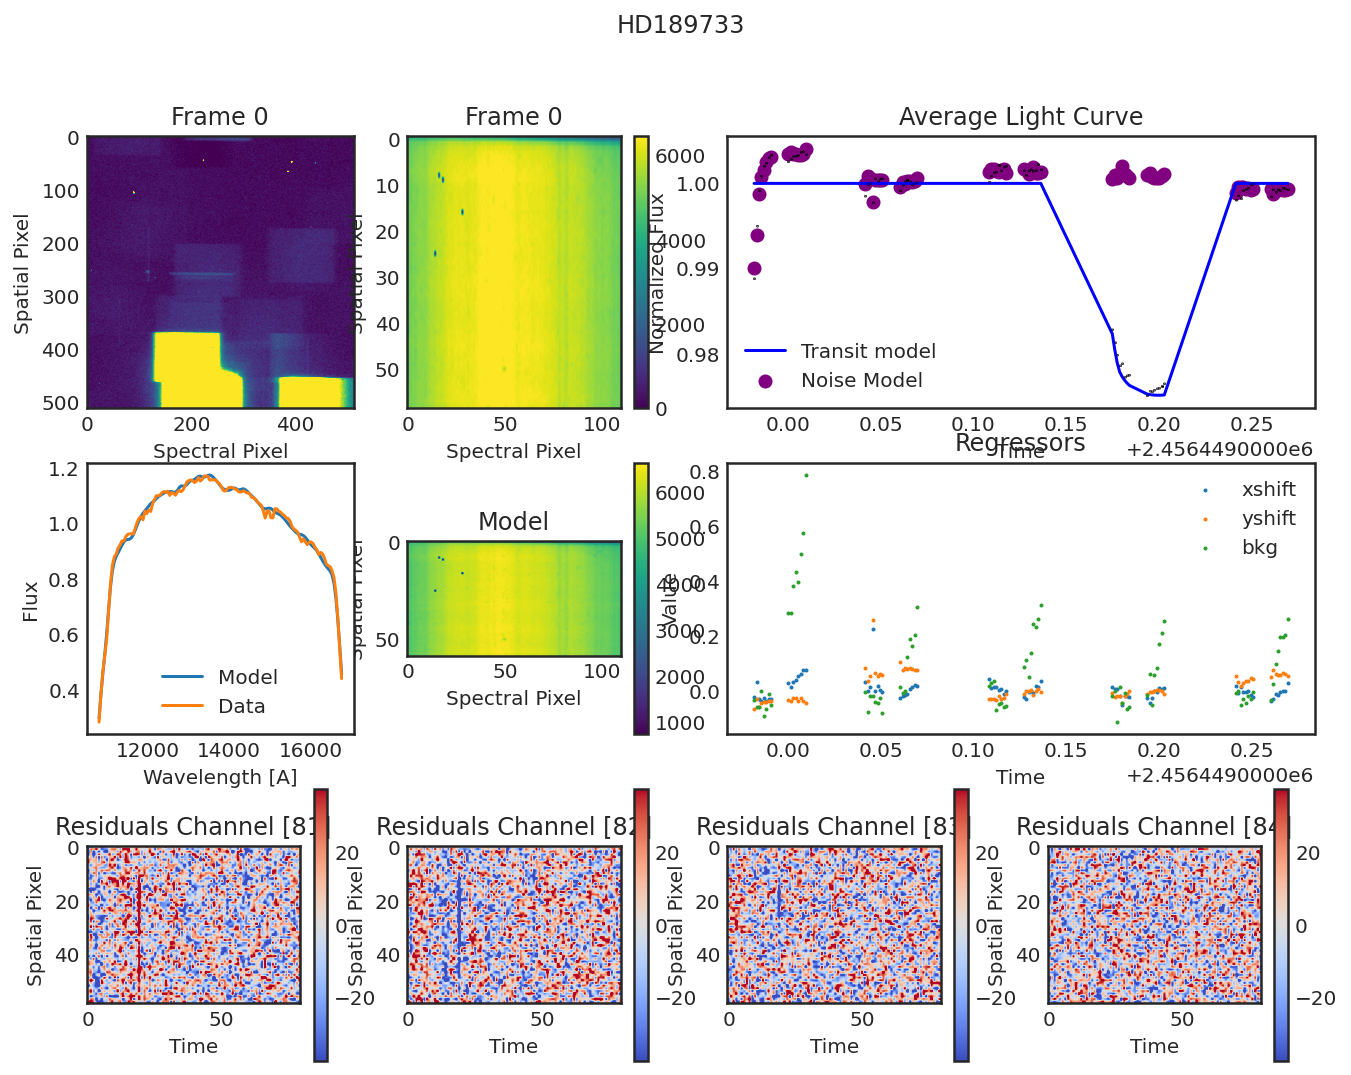

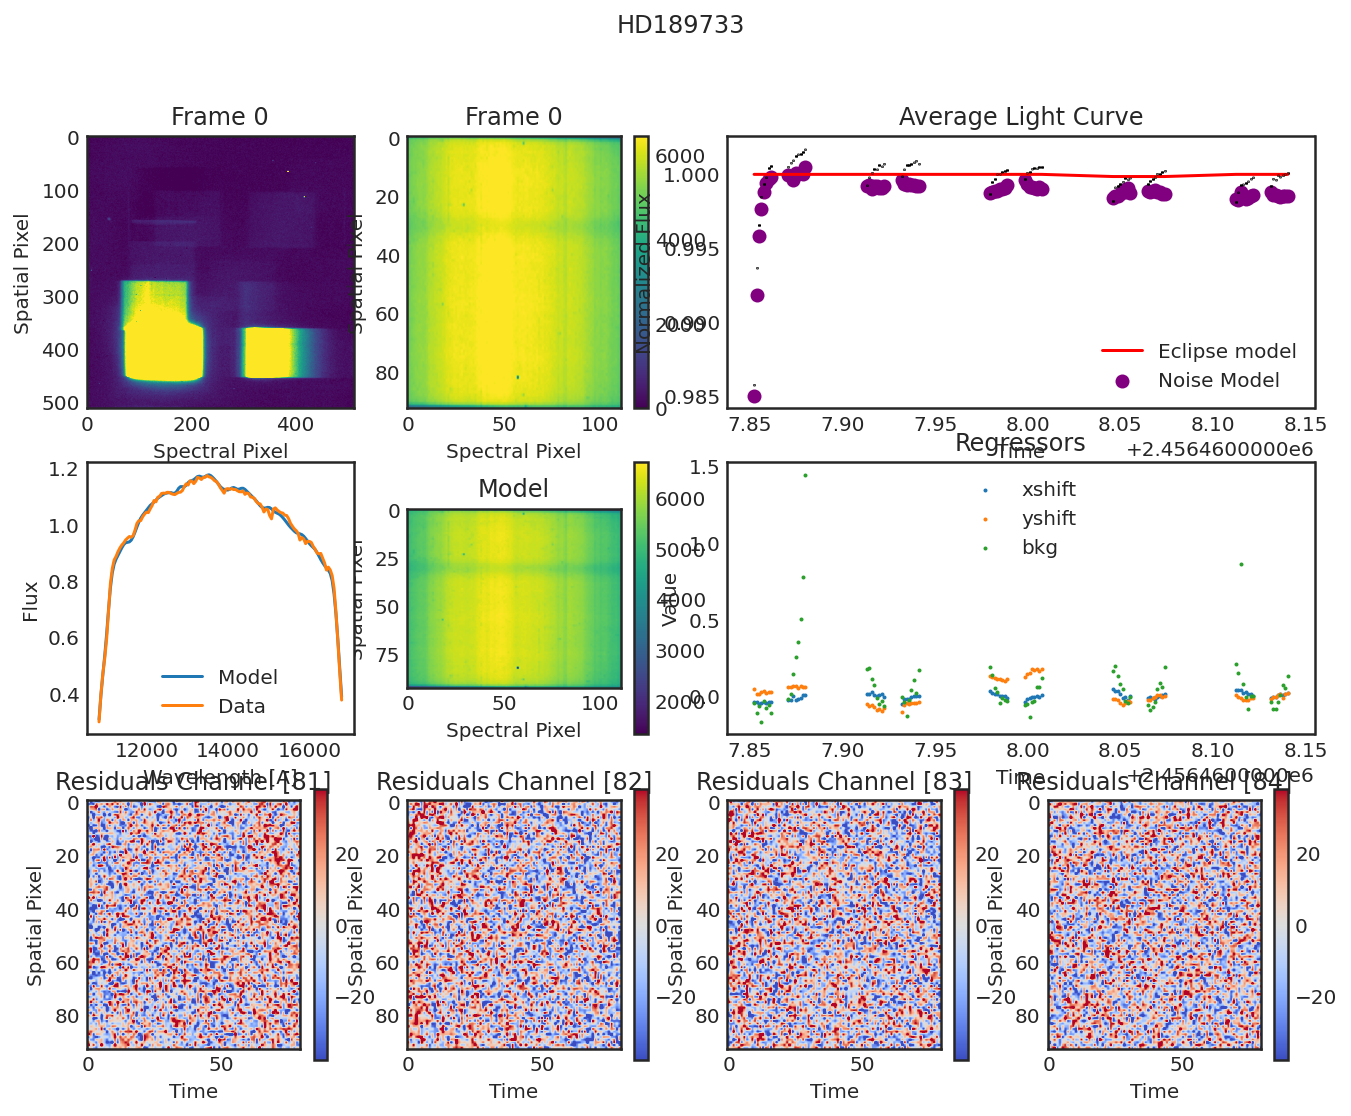

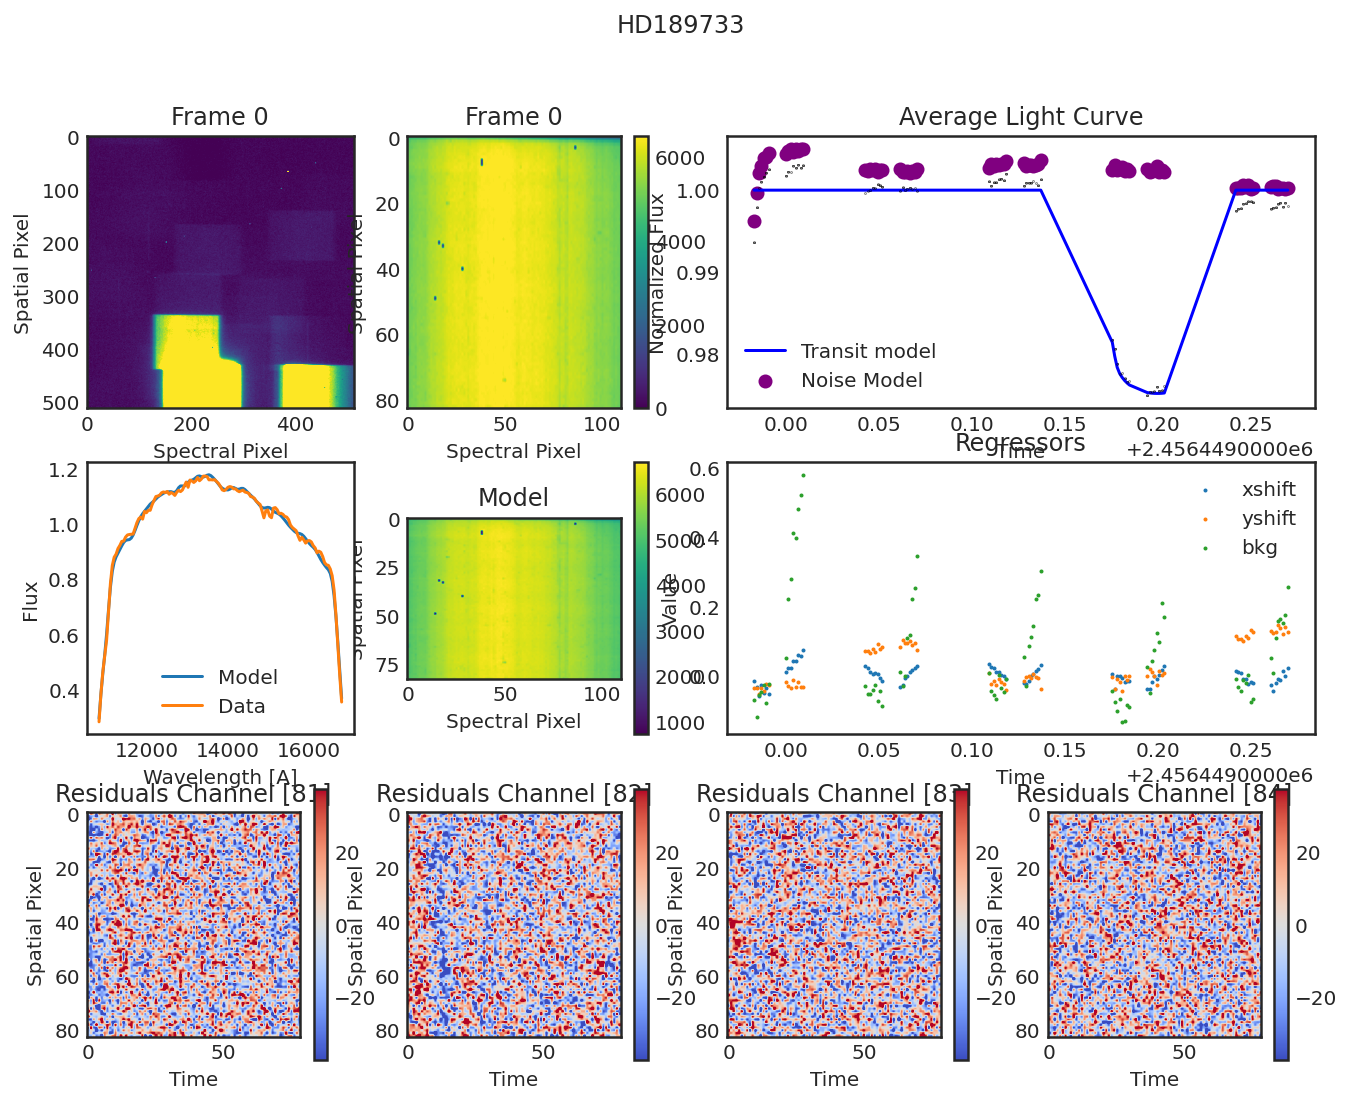

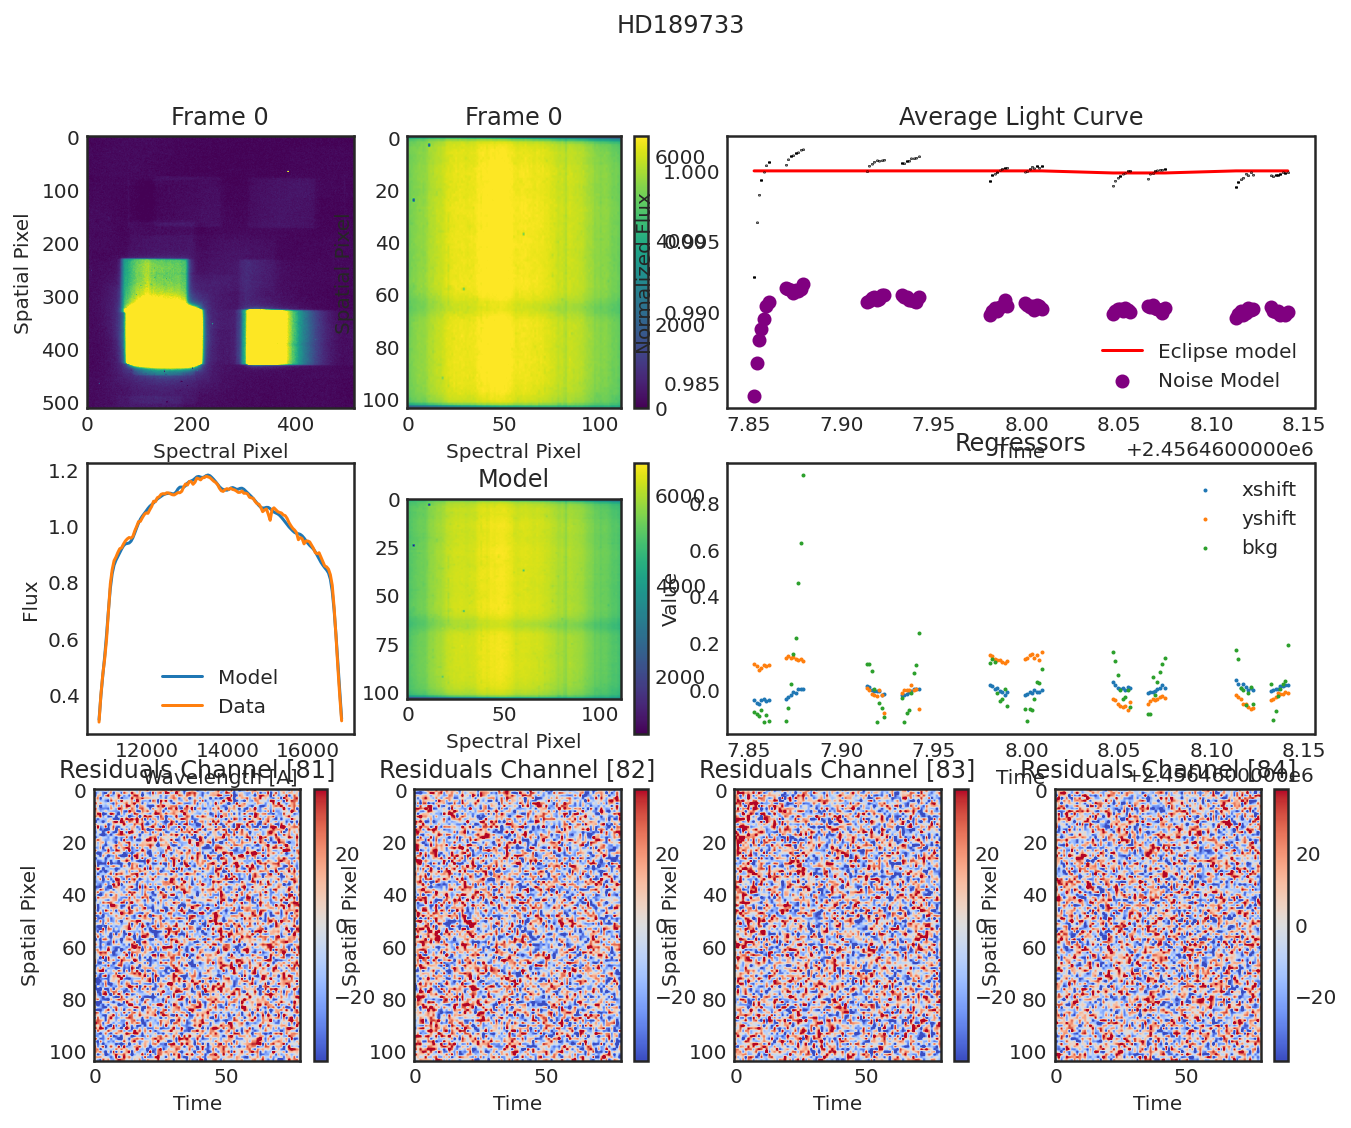

In [131]:
for visit in obs:
    visit.diagnose();
    plt.show();